In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [5]:
# 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 사망자 구하기
death_count = titanic[titanic['survived'] == 0]['survived'].count()

print("사망자 수:", death_count)
print("생존자 수:", titanic['survived'].count()-death_count)

사망자 수: 549
생존자 수: 342


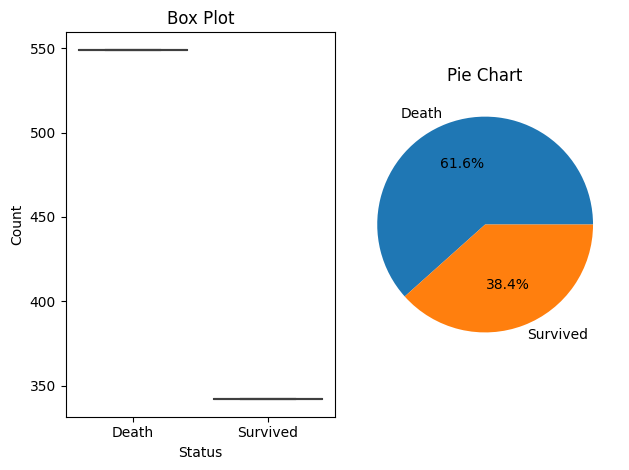

In [6]:
import matplotlib.pyplot as plt

# 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 사망자와 생존자 그룹 나누기
death_group = titanic[titanic['survived'] == 0]
survived_group = titanic[titanic['survived'] == 1]

# 사망자와 생존자 수
death_count = death_group['survived'].count()
survived_count = survived_group['survived'].count()

data = pd.DataFrame({'Count': [death_count, survived_count],
                     'Status': ['Death', 'Survived']})

# 상자 그림(Box Plot) 그리기
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Status', y='Count')
plt.title('Box Plot')

# 파이 그래프 그리기
plt.subplot(1, 2, 2)
sizes = data['Count']
labels = data['Status']
plt.pie(sizes, labels=labels, autopct='%.1f%%')
plt.title('Pie Chart')


plt.tight_layout()
plt.show()


In [7]:
titanic = sns.load_dataset('titanic')

■ 타이타닉 데이터 분석

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 생존한 승객과 생존하지 않은 승객을 모두 포함한 데이터를 사용
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# 결측값 처리
imputer = SimpleImputer(strategy='most_frequent') #열에서 가장 빈도가 높은 값으로 대체
X_imputed = imputer.fit_transform(X)  #결측값 대체한 결과 반환/ 대체된 결과인 X_imputed 변수

# 범주형 데이터를 원핫 인코딩
X_encoded = pd.get_dummies(pd.DataFrame(X_imputed))

# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=100)

# 로지스틱 회귀 모델 생성
logreg = LogisticRegression()

# 모델 학습
logreg.fit(X_train, y_train)

# 훈련 데이터에 대한 정확도 출력
train_accuracy = logreg.score(X_train, y_train)
print("훈련 데이터 정확도: {:.1f}".format(train_accuracy))

# 테스트 데이터에 대한 정확도 출력
test_accuracy = logreg.score(X_test, y_test)
print("테스트 데이터 정확도: {:.1f}".format(test_accuracy))

# 예측
y_pred = logreg.predict(X_test)

# 정확도 평가
accuracy = logreg.score(X_test, y_test)
print("정확도:", accuracy)

훈련 데이터 정확도: 1.0
테스트 데이터 정확도: 1.0
정확도: 1.0


In [9]:
from sklearn.svm import LinearSVC

# 서브 백터 머신 모델 생성
svm = LinearSVC()

#모델 학습
svm.fit(X_train,y_train)

# 훈련 데이터에 대한 정확도 출력
train_accuracy = svm.score(X_train,y_train)
print("훈련 데이터 정확도: {:.1f}".format(train_accuracy))

# 테스트 데이터에 대한 정확도 출력
test_accuracy = svm.score(X_test, y_test)
print("테스트 데이터 정확도: {:.1f}".format(test_accuracy))

# 예측
y_pred = svm.predict(X_test)

# 정확도 평가
accuracy = svm.score(X_test, y_test)
print("정확도:", accuracy)

훈련 데이터 정확도: 1.0
테스트 데이터 정확도: 1.0
정확도: 1.0


c:\Users\TJ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [10]:
from sklearn.neighbors import KNeighborsRegressor

# K-최근접 이웃 모델 생성
clf =KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
clf.fit(X_train,y_train)

# 훈련 데이터에 대한 정확도 출력
train_accuracy = clf.score(X_train,y_train)
print("훈련 데이터 정확도: {:.3f}".format(train_accuracy))

# 테스트 데이터에 대한 정확도 출력
test_accuracy = clf.score(X_test, y_test)
print("테스트 데이터 정확도: {:.3f}".format(test_accuracy))

# 예측
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = clf.score(X_test, y_test)
print("정확도:", accuracy)

훈련 데이터 정확도: 0.944
테스트 데이터 정확도: 0.852
정확도: 0.8516422426363371


■ 아이리스 데이터분석

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns

In [12]:
from sklearn.neural_network import MLPClassifier

iris = sns.load_dataset('iris')

# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], random_state=100)

# 신경망 모델 생성
mlp= MLPClassifier()

# 모델 훈련
mlp.fit(X_train,y_train)
# 훈련 데이터에 대한 정확도 출력
print('훈련 데이터 정확도 :{:.3f}'.format(mlp.score(X_train,y_train)))
# 테스트 데이터에 대한 정확도 출력
print("테스트 데이터 정확도 :{:.2f}".format(mlp.score(X_test,y_test)))

# 예측
y_pred = mlp.predict(X_test)

# 정확도 평가
accuracy = mlp.score(X_test,y_test)
print("정확도:",accuracy)

훈련 데이터 정확도 :0.973
테스트 데이터 정확도 :1.00
정확도: 1.0


c:\Users\TJ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logreg = LogisticRegression()

#모델 훈련
logreg.fit(X_train, y_train)
# 훈련 데이터에 대한 정확도 출력
print('훈련 데이터 정확도 :{:.3f}'.format(logreg.score(X_train,y_train)))
# 테스트 데이터에 대한 정확도 출력
print("테스트 데이터 정확도 :{:.2f}".format(logreg.score(X_test,y_test)))

y_pred = logreg.predict(X_test)

#정확도 평가
accuracy = logreg.score(X_test,y_test)
print("정확도:", accuracy)


훈련 데이터 정확도 :0.964
테스트 데이터 정확도 :0.95
정확도: 0.9473684210526315


c:\Users\TJ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정트리 모델 생성
tree = DecisionTreeClassifier()

#모델훈련
tree.fit(X_train,y_train)
# 훈련 데이터에 대한 정확도 출력
print('훈련 데이터 정확도 :{:.3f}'.format(tree.score(X_train,y_train)))
# 테스트 데이터에 대한 정확도 출력
print("테스트 데이터 정확도 :{:.2f}".format(tree.score(X_test,y_test)))

y_pred = tree.predict(X_test)

#정확도 평가
accuracy = tree.score(X_test,y_test)
print("정확도:", accuracy)

훈련 데이터 정확도 :1.000
테스트 데이터 정확도 :0.95
정확도: 0.9473684210526315


In [15]:
from sklearn.naive_bayes import GaussianNB

# 나이브 베이즈 모델 생성
nb = GaussianNB()

#모델훈련
nb.fit(X_train,y_train)
# 훈련 데이터에 대한 정확도 출력
print('훈련 데이터 정확도 :{:.3f}'.format(nb.score(X_train,y_train)))
# 테스트 데이터에 대한 정확도 출력
print("테스트 데이터 정확도 :{:.3f}".format(nb.score(X_test,y_test)))

y_pred = nb.predict(X_test)

#정확도 평가
accuracy = nb.score(X_test,y_test)
print("정확도:", accuracy)

훈련 데이터 정확도 :0.955
테스트 데이터 정확도 :0.947
정확도: 0.9473684210526315


In [16]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier()

#모델훈련
rf.fit(X_train,y_train)
# 훈련 데이터에 대한 정확도 출력
print('훈련 데이터 정확도 :{:.3f}'.format(rf.score(X_train,y_train)))
# 테스트 데이터에 대한 정확도 출력
print("테스트 데이터 정확도 :{:.3f}".format(rf.score(X_test,y_test)))

y_pred = rf.predict(X_test)

#정확도 평가
accuracy = rf.score(X_test,y_test)
print("정확도:", accuracy)

훈련 데이터 정확도 :1.000
테스트 데이터 정확도 :0.947
정확도: 0.9473684210526315


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# 그래디언트 부스팅 모델 생성
gb = GradientBoostingClassifier()

#모델훈련
gb.fit(X_train,y_train)
# 훈련 데이터에 대한 정확도 출력
print('훈련 데이터 정확도 :{:.3f}'.format(gb.score(X_train,y_train)))
# 테스트 데이터에 대한 정확도 출력
print("테스트 데이터 정확도 :{:.3f}".format(gb.score(X_test,y_test)))

y_pred = gb.predict(X_test)

#정확도 평가
accuracy = gb.score(X_test,y_test)
print("정확도:", accuracy)

훈련 데이터 정확도 :1.000
테스트 데이터 정확도 :0.947
정확도: 0.9473684210526315


■ 다이아몬드 데이터분석

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
dia = sns.load_dataset('diamonds')
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [20]:
# 데이터셋을 특성(X)과 타겟 변수(y)로 분리
X = dia[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
y = dia['price']

# 데이터 전처리
categorical_features = ['cut', 'color', 'clarity'] # 문자형
numeric_features = ['carat', 'depth', 'table'] # 숫자형

# 범주형 데이터를 원핫 인코딩
encoder = OneHotEncoder(drop='first')
X_encoded = pd.get_dummies(X, columns=categorical_features)
X_encoded = encoder.fit_transform(X_encoded)

# 숫자형 특성에서 결측값을 보정
imputer = SimpleImputer(strategy='median') # 결측치 중앙값
X_imputed = imputer.fit_transform(X_encoded)

# 데이터 집합을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=100)


In [21]:
from sklearn.linear_model import LinearRegression

# 훈련 모델 생성 및 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 계산
r2 = r2_score(y_test, y_pred)

# 예측값 출력
print("예측값:", y_pred)
print("RMSE:", rmse) #평균제곱근의 오차
print("R^2:", r2) # 0,1,음수로 측정치 판단/ 1에 가까울 수록 예측치가 맞다


예측값: [2250.51040834 7562.55959268 1089.45903914 ... 3352.19370933 4575.60645828
 3061.59681314]
RMSE: 1134.7993509620778
R^2: 0.9173791479453697


In [22]:
from sklearn.linear_model import Ridge

# 훈련 모델 생성 및 훈련
rd = Ridge()
rd.fit(X_train, y_train)

# 예측
y_pred = rd.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 계산
r2 = r2_score(y_test, y_pred)

# 예측값 출력
print("예측값:", y_pred)
print("RMSE:", rmse) #평균제곱근의 오차
print("R^2:", r2) # 0,1,음수로 측정치 판단/ 1에 가까울 수록 예측치가 맞다



예측값: [2244.62902973 7538.81248736 1145.69163995 ... 3323.13574504 4592.59133904
 3155.15341938]
RMSE: 1079.3934369483734
R^2: 0.9252500238925236


In [23]:
from sklearn.linear_model import Lasso

# 훈련 모델 생성 및 훈련
ls = Lasso()
ls.fit(X_train, y_train)

# 예측
y_pred = ls.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 계산
r2 = r2_score(y_test, y_pred)

# 예측값 출력
print("예측값:", y_pred)
print("RMSE:", rmse) #평균제곱근의 오차
print("R^2:", r2) # 0,1,음수로 측정치 판단/ 1에 가까울 수록 예측치가 맞다

예측값: [2271.86329706 7622.25245695 1300.51950814 ... 3254.36892662 5257.9332213
 3750.62013865]
RMSE: 1286.7923899106775
R^2: 0.893764790264298


In [24]:
from sklearn.linear_model import ElasticNet

# 훈련 모델 생성 및 훈련
esn = ElasticNet()
esn.fit(X_train, y_train)

# 예측
y_pred = esn.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 계산
r2 = r2_score(y_test, y_pred)

# 예측값 출력
print("예측값:", y_pred)
print("RMSE:", rmse) #평균제곱근의 오차
print("R^2:", r2) # 0,1,음수로 측정치 판단/ 1에 가까울 수록 예측치가 맞다

예측값: [3598.76361663 3732.80039457 3872.24114539 ... 3548.55147343 4054.21682074
 4446.29622489]
RMSE: 3821.9461390685774
R^2: 0.06282512510915839


In [25]:
from sklearn.tree import DecisionTreeRegressor

# 훈련 모델 생성 및 훈련
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# 예측
y_pred = tree.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 계산
r2 = r2_score(y_test, y_pred)

# 예측값 출력
print("예측값:", y_pred)
print("RMSE:", rmse) #평균제곱근의 오차
print("R^2:", r2) # 0,1,음수로 측정치 판단/ 1에 가까울 수록 예측치가 맞다

예측값: [1900. 8346. 1287. ... 2952. 4372. 3187.]
RMSE: 1143.4680679148682
R^2: 0.9161120475272736


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# 훈련 모델 생성 및 훈련
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# 예측
y_pred = gbr.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 계산
r2 = r2_score(y_test, y_pred)

# 예측값 출력
print("예측값:", y_pred)
print("RMSE:", rmse) #평균제곱근의 오차
print("R^2:", r2) # 0,1,음수로 측정치 판단/ 1에 가까울 수록 예측치가 맞다

예측값: [4041.69350494 4149.24945986 3108.08959857 ... 3618.4829936  4174.99335216
 4282.54930708]
RMSE: 2811.962629319032
R^2: 0.4926932962187889
